In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic_df = pd.read_csv('train.csv')

In [3]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### p1

In [5]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### p2

In [6]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### p3

In [7]:
titanic_df.groupby('Pclass',as_index = False)['Survived'].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [8]:
titanic_df.groupby('Sex',as_index = False)['Survived'].mean().sort_values('Survived',ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [9]:
titanic_df.groupby('SibSp',as_index = False)['Survived'].mean().sort_values('Survived',ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [10]:
titanic_df.groupby('Parch',as_index = False)['Survived'].mean().sort_values('Survived',ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


### p4

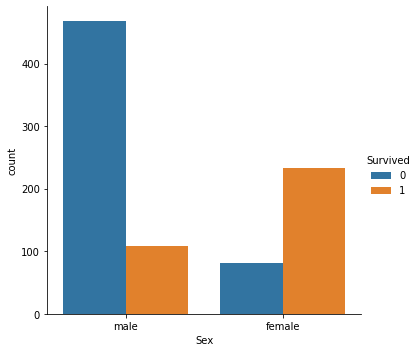

In [11]:
sns.catplot(x ="Sex", hue ="Survived", kind ="count", data = titanic_df)

Most of the male passengers died during that incident and the women survived more.

### p5

(2, 0)

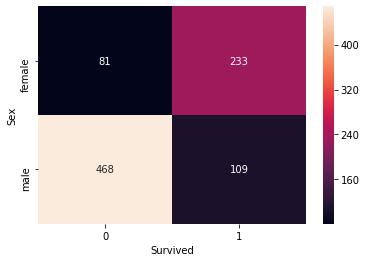

In [12]:
group = titanic_df.groupby(['Sex', 'Survived'])
Sex_survived = group.size().unstack()
sns.heatmap(Sex_survived, annot = True ,fmt = 'd')
plt.ylim(2,0)

(7, 0)

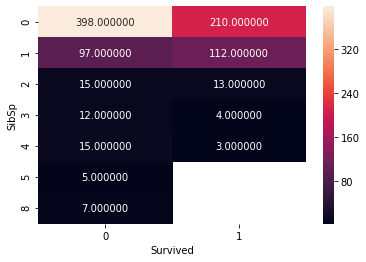

In [13]:
group = titanic_df.groupby(['SibSp', 'Survived'])
SibSp_survived = group.size().unstack()
 
sns.heatmap(SibSp_survived, annot = True, fmt = 'f')
plt.ylim(7,0)

(7, 0)

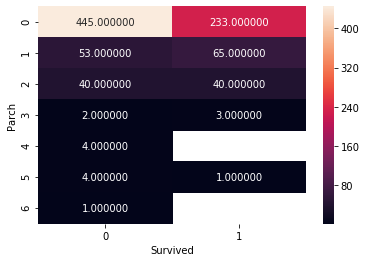

In [14]:
group = titanic_df.groupby(['Parch', 'Survived'])
Parch_survived = group.size().unstack()
 
sns.heatmap(Parch_survived, annot = True, fmt = 'f')
plt.ylim(7,0)

### p6

In [15]:
def bar_plot(column_name):
    """
        input: variable ex: "Survived"
        output: barplot & value count
    """
    # get feature
    feature_data = titanic_df[column_name]
    # count number of data(value/sample)
    feature_count= feature_data.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(feature_count.index, feature_count)
    plt.xticks(feature_count.index, feature_count.index.values)
    plt.ylabel("Frequency")
    plt.title(column_name)
    plt.show()
    print(f"{column_name}: \n {feature_count}")

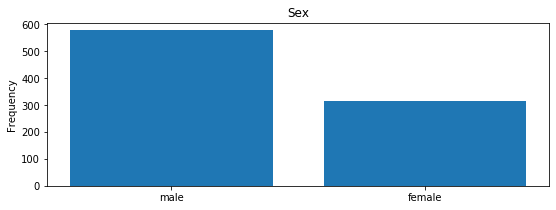

Sex: 
 male      577
female    314
Name: Sex, dtype: int64


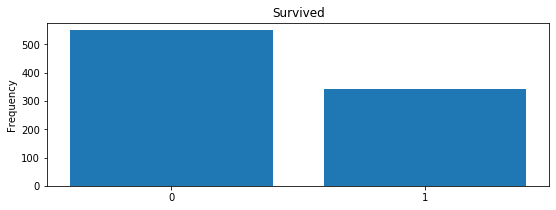

Survived: 
 0    549
1    342
Name: Survived, dtype: int64


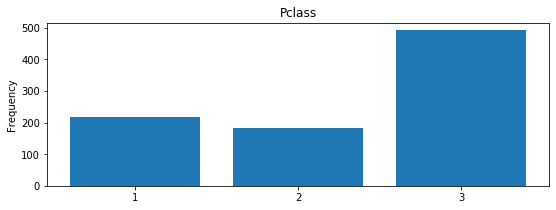

Pclass: 
 3    491
1    216
2    184
Name: Pclass, dtype: int64


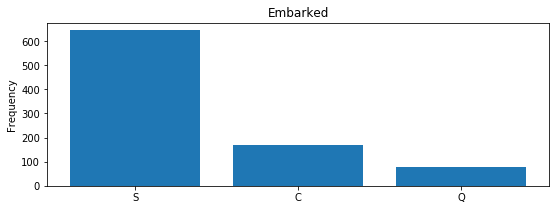

Embarked: 
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [16]:
categories = ['Sex','Survived','Pclass','Embarked']
for col in categories:
    bar_plot(col)

### p7

In [17]:
def plot_hist(column_name):
    plt.figure(figsize = (9,3))
    plt.hist(titanic_df[column_name])
    plt.xlabel(column_name)
    plt.ylabel("Frequency")
    plt.title(f"{column_name} distribution with hist")
    plt.show()

C:\Users\shsae\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\shsae\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


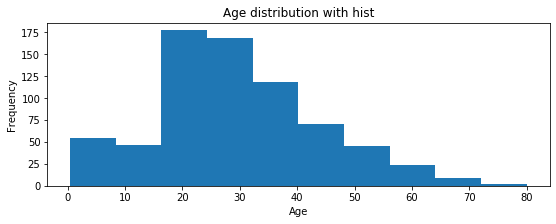

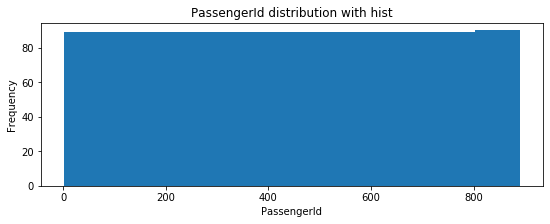

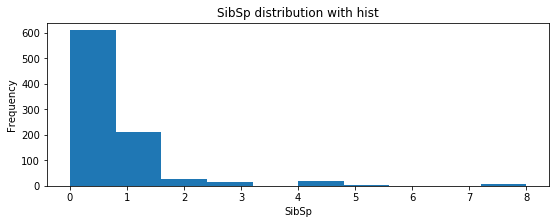

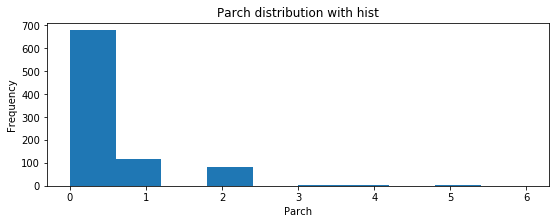

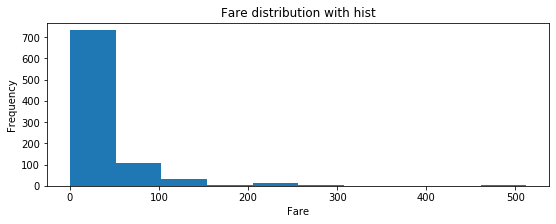

In [18]:
numerical = ['Age','PassengerId','SibSp','Parch','Fare'] 
for col in numerical:
    plot_hist(col)

### p8

In [19]:
def detect_outliers(dataFrame,features):
    pass

In [ ]:
titanic_df.loc[detect_outliers(titanic_df,["Age","SibSp","Parch","Fare"])]

### p9

In [21]:
embarked_df = pd.DataFrame(titanic_df['Embarked'])
embarked_df.describe()

,Embarked
count,889
unique,3
top,S
freq,644


In [24]:
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S',inplace = True)

### p10

In [25]:
titanic_df.drop(columns = 'Cabin',inplace = True)

### p11

In [26]:
age_df = pd.DataFrame(titanic_df['Age'])
age_df.describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


In [27]:
titanic_df[titanic_df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,None
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,None
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,None
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,None
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,None
...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,None
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,None
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,None
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,None


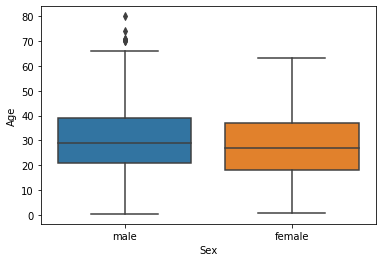

In [28]:
sns.boxplot(x = "Sex", y = "Age", data = titanic_df)
plt.show()

Despite having a number of outliers, both of the boxplots look the same, so it won't be a good feature alone.

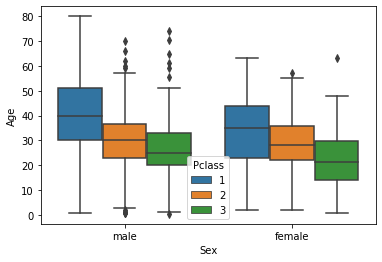

In [29]:
sns.boxplot(x = "Sex", y = "Age", hue = "Pclass",data = titanic_df)
plt.show()

The combination of sex, age and Pclass can be a good feature.

### p12

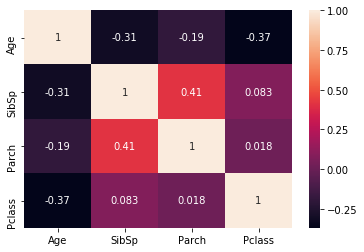

In [30]:
sns.heatmap(titanic_df[["Age","Sex","SibSp","Parch","Pclass"]].corr(), annot = True)
plt.ylim(4,0)
plt.show()

The higher number (both negative and positive) in the squares results in a higher correlation; so SibSp and Pclass are the answers.

### p13

In [31]:
median_age = titanic_df['Age'].median()

### p14

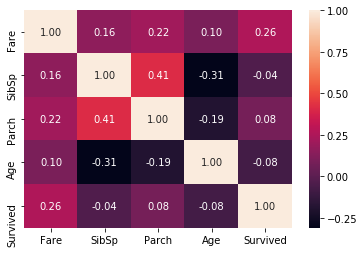

In [32]:
corr_list = ["Fare", "SibSp", "Parch", "Age", "Survived"]
sns.heatmap(titanic_df[corr_list].corr(), annot = True, fmt = ".2f")
plt.ylim(5,0)
plt.show()

Fare has the most correlation with survived:/ 

### p15

In [39]:
titanic_df['Sex'].replace((['female','male'],[0,1]),inplace = True)